# Data Analysis

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import diplomatic_exchanges as de

In [2]:
# create a plots folder to store plots
import os
if not os.path.exists('./plots/'):
    os.mkdir('./plots')
if not os.path.exists('./plots/results'):
    os.mkdir('./plots/results')

In [3]:
# create a log file
import logging

# Configure logging
logging.basicConfig(filename='regression.log', level=logging.DEBUG)

# # Write log messages
# logging.debug('This is a debug message')
# logging.info('This is an info message')
# logging.warning('This is a warning message')
# logging.error('This is an error message')
# logging.critical('This is a critical message')    

# Example: data for 2005
In the following we will examine modelling the data for 2005.

In [4]:
# run query to get data for regression analysis from database
conn = sqlite3.connect('diplomatic.db')
data = de.get_data_for_regression(conn, 2005)

In [5]:
# use a binary variable signifying whether the US president visited each country or not
# 1: the president visited
# 0: the president did NOT visit
data['president_visit_binary'] = data['destination country'].map(lambda x: 0 if x is None else 1)

In [6]:
# example dataset
data.head(4)

,index,pagerank,katz,eigenvector,betweenness,closeness,degree,in_degree,out_degree,node_id,...,year,milex,milper,irst,pec,tpop,upop,cinc,version,president_visit_binary
0,24,1.000000,0.966833,0.348819,5.160641e-13,1.0,1.000000,0.948718,1.000000,2,...,2005,495326000,1474,94897,3267376,298166.0,164533.0,0.156302,2021,0
1,48,0.521256,0.804169,0.466178,7.604882e-13,1.0,0.741379,0.621795,0.701754,20,...,2005,13224000,62,15327,370302,32253.0,18647.0,0.010920,2021,1
2,73,0.014564,0.033838,0.551500,9.068511e-37,1.0,0.022989,0.025641,0.017544,31,...,2005,36000,1,0,266,329.0,0.0,0.000025,2021,0
3,1615,0.407570,0.609600,0.616611,6.781469e-09,1.0,0.528736,0.564103,0.415205,40,...,2005,1444000,49,245,12063,11292.0,2927.0,0.001351,2021,0


## compute GDP per capita

In [7]:
# compute gdp per capita
data['per_capita'] = data['rgdpna']/data['pop']
data['per_capita'].head(10)

0    54449.451941
1    45565.692084
2    35576.570576
3             NaN
4     1574.206085
5     9945.891176
6     8476.961664
7    24193.637657
8    11799.938776
9     9091.544015
Name: per_capita, dtype: float64

In [8]:
# there are some values missing from the Pennworld table dataset
sum(data["per_capita"].isna())

28

In [9]:
# we decide to drop them since they correspond to a small number of countries
data = data[data["per_capita"].notna()]
data

,index,pagerank,katz,eigenvector,betweenness,closeness,degree,in_degree,out_degree,node_id,...,milex,milper,irst,pec,tpop,upop,cinc,version,president_visit_binary,per_capita
0,24,1.000000,0.966833,0.348819,5.160641e-13,1.0,1.000000,0.948718,1.000000,2,...,495326000,1474,94897,3267376,298166.0,164533.0,0.156302,2021,0,54449.451941
1,48,0.521256,0.804169,0.466178,7.604882e-13,1.0,0.741379,0.621795,0.701754,20,...,13224000,62,15327,370302,32253.0,18647.0,0.010920,2021,1,45565.692084
2,73,0.014564,0.033838,0.551500,9.068511e-37,1.0,0.022989,0.025641,0.017544,31,...,36000,1,0,266,329.0,0.0,0.000025,2021,0,35576.570576
4,104,0.046998,0.124208,0.761892,3.889137e-37,1.0,0.097701,0.070513,0.087719,41,...,-9,0,0,3954,9261.0,2171.0,0.000584,2021,0,1574.206085
5,147,0.136362,0.229516,0.595980,5.983210e-08,1.0,0.183908,0.185897,0.157895,42,...,273000,25,0,6039,9343.0,2819.0,0.000820,2021,0,9945.891176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1570,0.267671,0.510239,0.802347,7.937721e-13,1.0,0.367816,0.352564,0.321637,840,...,836000,106,470,35953,85821.0,16203.0,0.005195,2021,1,4950.987895
176,1575,0.378317,0.676125,0.305161,2.232692e-11,1.0,0.488506,0.480769,0.444444,850,...,2869000,302,3675,207738,224481.0,29974.0,0.014128,2021,1,6518.595408
178,1583,0.390267,0.604218,0.498213,1.279420e-05,1.0,0.505747,0.442308,0.479532,900,...,15550000,53,7757,181092,20521.0,13667.0,0.007516,2021,1,46135.263007
180,1591,0.178444,0.340071,0.442638,5.656720e-12,1.0,0.229885,0.250000,0.175439,920,...,1449000,9,889,20923,4134.0,1905.0,0.000915,2021,0,33447.358963


## Multicolinearity

In [10]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation coefficients, year 2005')

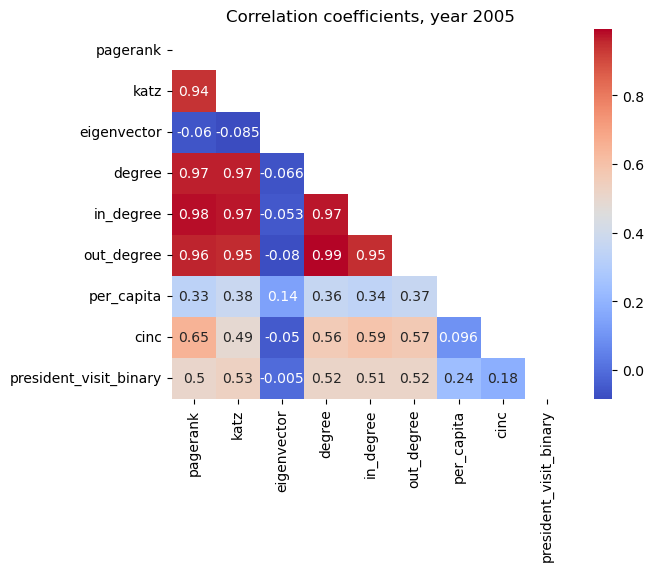

In [11]:
# check for correlation between measures and economic, power variables
columns_for_heatmap = ['pagerank', 'katz', 'eigenvector', 'degree', 'in_degree', 'out_degree', 'per_capita', 'cinc', 'president_visit_binary']

correlations = data[columns_for_heatmap].corr()

# creating mask
mask = np.triu(np.ones_like(correlations))

sns.heatmap(correlations, cmap='coolwarm', mask=mask, annot=True)
plt.title("Correlation coefficients, year 2005")

We note that our centrality measures are highly correlated with each other. 
Eigenvector is an exemption to this rule. 
In addition the power measure cinc is highly correlated with all centrality measures (except eigenvector) but not correlated with the economic measure of `per_capita`.
Per-capita is corerlated with all measures (including eigenvecgtor) but in a smaller degree.
The president visits binary target variable seems to be relatively correlated with all centrality measures (except eigenvector) as well as with `per_capita` and `cinc` (although in a smaller degree).

In the following we will plot scatter plots for all variables as well as their distributions for the two target classes (visit vs no-visit).

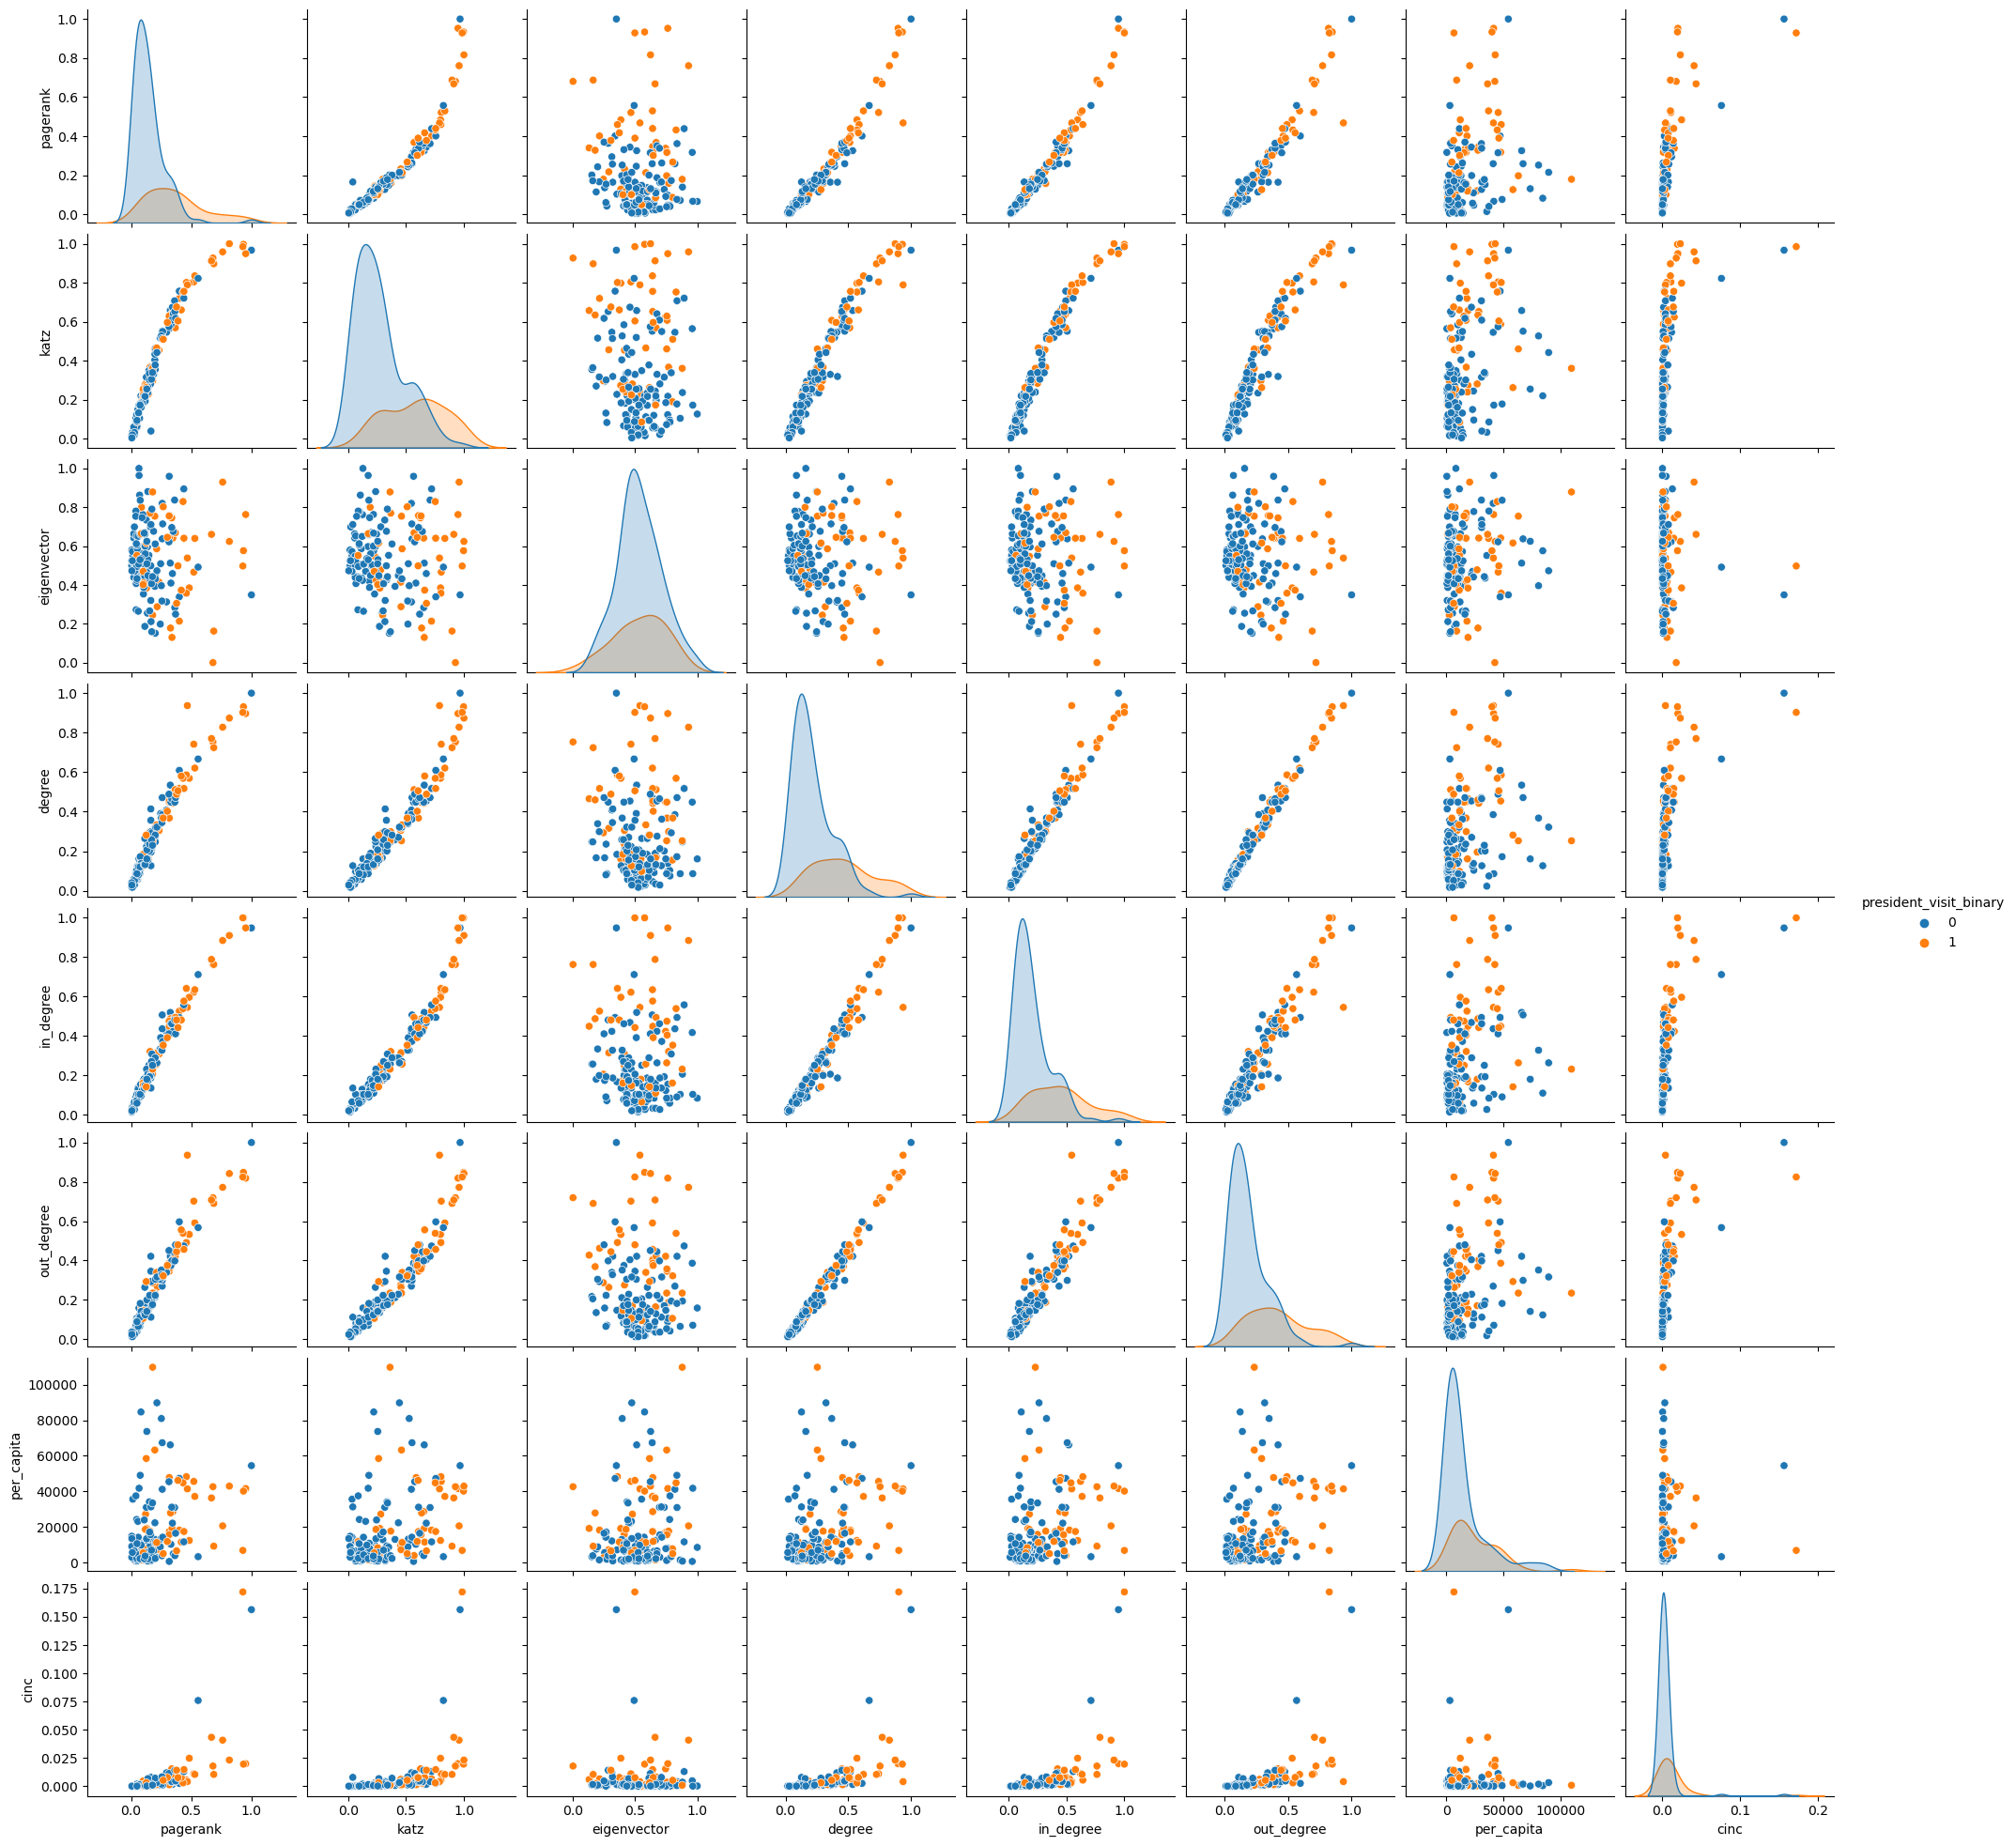

In [12]:
# check distritbutions and scatter plots for all variables
# blue: country not visited
# orange: country visited
sns.pairplot(data[columns_for_heatmap], hue='president_visit_binary')

We validate qualitatively our correlation analysis results.
Firstly, we observe that eigenvector is not significantly correlated with any our variables.
We can see that `cinc` is relatively correlated with our centrality measures (except eigenvector, while the relation between `per_capita` and centralities is powerfull.
In addition, we observe that centralities are not neccessarily lineraly correlated with each other (e.g. we can see that the relation between pagerank and katz is non-linera).
Finally, we observe that the majority of the visits refers to higher centrality values and this seems to be stronger for centrality measures rather than the economic and power variables.

# Logistic regression models for each measure separately and per year
In the following we will examine different logistic regression models for each centrality measure.

Essentially we will be fitting the following model:

$y \sim C_i + per\_capita + cinc $

for all the following centrality measures:
- pagerank
- katz
- eigenvector
- degree
- in-degree
- out-degree

In [13]:
import statsmodels.formula.api as smf

In [14]:
# apply logistic regression for each year 2005 using each measure and cinc and per_capita variables

measures = ['pagerank', 'katz', 'eigenvector', 'degree', 'in_degree', 'out_degree']

models_per_measure = {}
for year in range(1970,2010,5):
    models_per_measure[year] = {}
    
    data = de.get_data_for_regression(conn, year)
    data['president_visit_binary'] = data['destination country'].map(lambda x: 0 if x is None else 1)
    data['per_capita'] = data['rgdpna']/data['pop']
    data = data[data["per_capita"].notna()]
    
    for measure in measures:
        log_reg = smf.logit(f"president_visit_binary ~ {measure} + cinc + per_capita", data=data).fit()
        models_per_measure[year][measure] = log_reg

# print model summaries in the log file
for year, models in models_per_measure.items():
    logging.info(year)
    for measure, model in models.items():
        logging.info(measure)
        logging.info(model.summary())
        logging.info('')
    logging.info('*************************************************************************************************************************')
    logging.info('*************************************************************************************************************************')
    logging.info('*************************************************************************************************************************')

Optimization terminated successfully.
         Current function value: 0.444138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.457703
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.484998
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.446754
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.430501
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.463135
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.333477
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327129
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.417808
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.350365
  

We observe that all the measures are statistically significant across time except the eigenvector centrality. 
We thus continue modelling excluding eigenvector from our analysis.

In [15]:
# redefine measures
measures = ['pagerank', 'katz', 'degree', 'in_degree', 'out_degree']

# PCA analysis
We will aggregate all the measures using PCA

## Example: apply PCA for 2005

In [16]:
# load and process data for 2005
data = de.get_data_for_regression(conn, 2005)
data['president_visit_binary'] = data['destination country'].map(lambda x: 0 if x is None else 1)
data['per_capita'] = data['rgdpna']/data['pop']
data = data[data["per_capita"].notna()]

In [17]:
# dataset columns to apply PCA
X = data[measures].values

In [18]:
# eigenvalues and eigenvectors for square matrix
square = np.dot(np.transpose(X),X)
np.linalg.eig(square)

(array([1.03001344e+02, 6.96018196e-01, 4.92387466e-01, 3.59508986e-03,
        1.13678902e-01]),
 array([[ 0.35749665, -0.6116639 , -0.37878277,  0.37347161,  0.46379519],
        [ 0.55786191,  0.73356092, -0.10910028,  0.1179315 ,  0.35336631],
        [ 0.44959998, -0.09115377,  0.39869932,  0.54358979, -0.57887809],
        [ 0.43884401, -0.09390894, -0.54248561, -0.50860495, -0.49560813],
        [ 0.40775241, -0.26575881,  0.62559488, -0.54077931,  0.2816008 ]]))

We can see that the first eigenvalue is really large compared to the rest.
We will evaluate two models one with only the first principal component and another with the first two principal components.

In [19]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [20]:
# transform data to principal components
X_pca = pca.transform(X)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
pca_df

,PC1,PC2
0,1.563928,0.285107
1,0.905409,0.059839
2,-0.568015,0.029715
3,-0.425390,0.018418
4,-0.215994,0.013691
...,...,...
159,0.207396,-0.048148
160,0.499991,-0.060348
161,0.471900,0.022780
162,-0.084954,-0.041510


In [21]:
# add principal components to dataset
data['PC1'] = pca_df['PC1'].values
data['PC2'] = pca_df['PC2'].values

In [22]:
# apply logistic regression for year 2005 using the PC1, PC2, cinc and per_capita variables
import statsmodels.formula.api as smf
log_reg_1 = smf.logit("president_visit_binary ~ PC1 + PC2 + cinc + per_capita", data=data).fit()
logging.info("")
logging.info("")
logging.info('PCA analysis')
logging.debug(log_reg_1.summary())
print(log_reg_1.summary())

Optimization terminated successfully.
         Current function value: 0.444482
         Iterations 6
                             Logit Regression Results                             
Dep. Variable:     president_visit_binary   No. Observations:                  164
Model:                              Logit   Df Residuals:                      159
Method:                               MLE   Df Model:                            4
Date:                    Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2580
Time:                            18:54:51   Log-Likelihood:                -72.895
converged:                           True   LL-Null:                       -98.247
Covariance Type:                nonrobust   LLR p-value:                 2.574e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1003      0.305     -3.604      0.000      -1.699      -0.5

We can see that the coefficient for PC2 is not statistically significant while its value is also small. Therefore we will further exclude it from our analysis

In [23]:
# apply logistic regression to PC1, cinc and per_capita variables
log_reg_2 = smf.logit("president_visit_binary ~ PC1 + cinc + per_capita", data=data).fit()
logging.info(log_reg_2.summary())
print(log_reg_2.summary())

Optimization terminated successfully.
         Current function value: 0.444530
         Iterations 6
                             Logit Regression Results                             
Dep. Variable:     president_visit_binary   No. Observations:                  164
Model:                              Logit   Df Residuals:                      160
Method:                               MLE   Df Model:                            3
Date:                    Sat, 04 Mar 2023   Pseudo R-squ.:                  0.2580
Time:                            18:54:51   Log-Likelihood:                -72.903
converged:                           True   LL-Null:                       -98.247
Covariance Type:                nonrobust   LLR p-value:                 5.702e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0881      0.289     -3.761      0.000      -1.655      -0.5

We observe that PC1 is statistically significant. We also observe that cinc is also statistically significant while per_capita is not statistically significant. This means that controlling for economic measures of status, our network-based international relations measure plays an important role in predicting a president's visits. Cinc is a variable signifying the political situation in countries which is also related to international affairs.

# Modelling using PCA1
In the following we will apply different logistic regression models to our yearly selected data.
We will apply PCA to `pagerank`, `katz`, `degree`, `in_degree` and `out_degree` centrality measures and use the first principal component `PC1` as a variable in our logistic regression models. 
We thus apply the following models to yearly data:

$y \sim PC1 + per\_capita + cinc$

## Fit models

In [24]:
measures = ['pagerank', 'katz', 'degree', 'in_degree', 'out_degree']
regression_dict = {} 
models_reg1 = []
models_reg2 = []
for i in range(1970,2010,5):
    
    data = de.get_data_for_regression(conn, i)
    
    # generate dummys
    data['president_visit_binary'] = data['destination country'].map(lambda x: 0 if x is None else 1)
    
    # extract the columns for PCA
    X = data[measures].values
    
    
    # fit the PCA object
    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    # obtain the principal components and assign them to the dataset
    pca_df = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
    data['PC1'] = pca_df['PC1'].values
    data['PC2'] = pca_df['PC2'].values
    
    # generate the economic variable
    data['per_capita'] = data['rgdpna']/data['pop']
    
    # drop empty GDP per capita samples
    data = data[data["per_capita"].notna()]
    
    # fit the logistic regression models (with 1 and 2 PCA components)
    log_reg_1 = smf.logit("president_visit_binary ~ PC1 + PC2 + cinc + per_capita", data=data).fit()
    log_reg_2 = smf.logit("president_visit_binary ~ PC1 + cinc + per_capita", data=data).fit()
    
    # print model summaries to log 
    logging.info(year)
    logging.info(log_reg_1.summary())
    logging.info(log_reg_2.summary())
    
    # store coefficient data in dataframe
    for name1 in log_reg_1.params.index:
        regression_dict[f'model1_coef_{name1}'] = regression_dict.get(f'model1_coef_{name1}', []) + [log_reg_1.params[name1]]
        regression_dict[f'model1_std_{name1}'] = regression_dict.get(f'model1_std_{name1}', []) + [log_reg_1.bse[name1]]
    for name2 in log_reg_2.params.index:
        regression_dict[f'model2_coef_{name2}'] = regression_dict.get(f'model2_coef_{name2}', []) + [log_reg_2.params[name2]]
        regression_dict[f'model2_std_{name2}'] = regression_dict.get(f'model2_std_{name2}', []) + [log_reg_2.bse[name2]]
    
    # sotre models in lists
    models_reg1.append(log_reg_1)
    models_reg2.append(log_reg_2)

Optimization terminated successfully.
         Current function value: 0.424901
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.447935
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.319958
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.336951
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306988
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.310309
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.291709
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.292458
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.333134
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339979
  

## Examine models

In [25]:
regression_data = pd.DataFrame(regression_dict)
regression_data['year'] = range(1970,2010,5)
regression_data

,model1_coef_Intercept,model1_std_Intercept,model1_coef_PC1,model1_std_PC1,model1_coef_PC2,model1_std_PC2,model1_coef_cinc,model1_std_cinc,model1_coef_per_capita,model1_std_per_capita,model2_coef_Intercept,model2_std_Intercept,model2_coef_PC1,model2_std_PC1,model2_coef_cinc,model2_std_cinc,model2_coef_per_capita,model2_std_per_capita,year
0,-1.415529,0.369419,1.879136,0.660603,6.995167,3.077481,-15.353445,13.732045,-0.000014,0.000031,-1.311640,0.361083,1.795687,0.646687,-8.794408,12.058404,-0.000024,0.000032,1970
1,-2.346191,0.432008,2.848211,0.649324,-9.206228,4.712441,-11.042588,13.487078,0.000012,0.000012,-2.182041,0.391846,2.538009,0.593278,3.499016,13.097144,0.000006,0.000013,1975
2,-2.506812,0.448954,2.877121,0.655180,-4.875223,5.429233,-8.663257,12.721208,0.000009,0.000014,-2.393715,0.413014,2.754450,0.626126,-6.385247,12.462715,0.000005,0.000014,1980
3,-2.586134,0.451970,2.713220,0.733016,-1.938491,4.267467,-9.047240,14.305215,0.000010,0.000017,-2.555495,0.439191,2.713615,0.734670,-10.204345,14.248174,0.000009,0.000016,1985
4,-2.270017,0.417944,3.293554,0.736383,-5.875241,4.317052,-13.679151,12.597830,0.000013,0.000016,-2.143398,0.386205,3.353601,0.749110,-17.148355,12.663573,0.000010,0.000015,1990
5,-2.154959,0.390092,3.770696,0.811612,-0.837369,4.739210,-37.923944,20.236628,0.000023,0.000012,-2.127419,0.354584,3.824459,0.763460,-40.283213,15.572545,0.000023,0.000012,1995
6,-0.602525,0.287957,3.620399,0.757926,-4.689975,5.031866,-21.194168,16.602475,-0.000007,0.000011,-0.489459,0.261890,4.011669,0.695141,-31.935807,12.611336,-0.000006,0.000011,2000
7,-1.275164,0.306775,3.239672,0.654280,-0.418973,4.290706,-23.003569,13.706427,0.000004,0.000010,-1.264907,0.287732,3.262404,0.615596,-23.836351,10.804959,0.000004,0.000010,2005


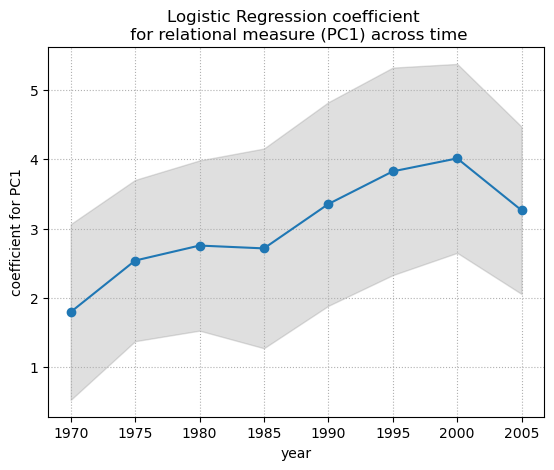

In [26]:
plt.title("Logistic Regression coefficient \n for relational measure (PC1) across time")
plt.ylabel('coefficient for PC1')
plt.xlabel("year")
plt.grid(ls=':')
plt.plot(regression_data['year'], regression_data['model2_coef_PC1'], 'o-')
plt.fill_between(regression_data['year'], 
                 regression_data['model2_coef_PC1'] - 1.96 * regression_data['model2_std_PC1'], 
                 regression_data['model2_coef_PC1'] + 1.96 * regression_data['model2_std_PC1'], 
                 alpha=0.25, color='grey')
plt.savefig('./plots/results/PC1_coef_across_time.png',dpi=300)

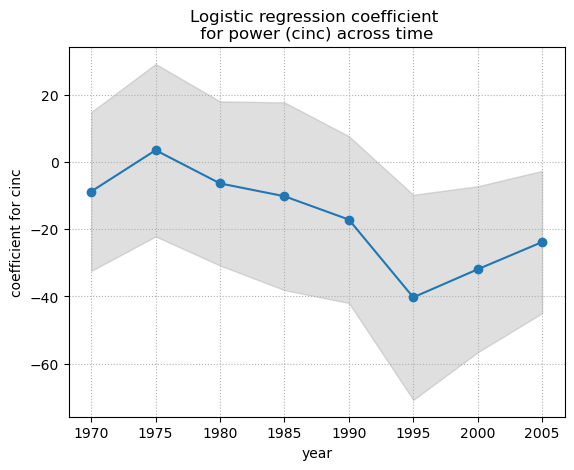

In [27]:
plt.title("Logistic regression coefficient \n for power (cinc) across time ")
plt.ylabel('coefficient for cinc')
plt.xlabel('year')
plt.grid(ls=':')
plt.plot(regression_data['year'], regression_data['model2_coef_cinc'], 'o-')
plt.fill_between(regression_data['year'], regression_data['model2_coef_cinc'] - 1.96 * regression_data['model2_std_cinc'], 
                 regression_data['model2_coef_cinc'] + 1.96 * regression_data['model2_std_cinc'], 
                 alpha=0.25, color='grey')
plt.savefig('./plots/results/cinc_coef_across_time.png',dpi=300)

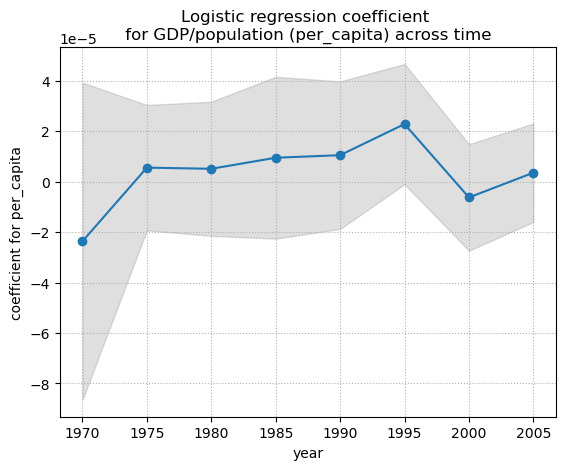

In [28]:
plt.title("Logistic regression coefficient \n for GDP/population (per_capita) across time ")
plt.ylabel('coefficient for per_capita')
plt.xlabel('year')
plt.grid(ls=':')
plt.plot(regression_data['year'], regression_data['model2_coef_per_capita'], 'o-')
plt.fill_between(regression_data['year'], 
                 regression_data['model2_coef_per_capita'] - 1.96 * regression_data['model2_std_per_capita'],
                 regression_data['model2_coef_per_capita'] + 1.96 *  regression_data['model2_std_per_capita'], alpha=0.25, color='grey')
plt.savefig('./plots/results/per_capita_coef_across_time.png',dpi=300)

In [29]:
# close log file
logging.shutdown()